In [1]:
import pandas as pd 
import yfinance as yf
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 20, 10 

plt.style.use('ggplot')

%matplotlib inline  
# %pylab inline

In [2]:
spy_data = yf.download('^GSPC', as_panel=False)

[*********************100%***********************]  1 of 1 completed


In [3]:
spy_data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [7]:
spy_data.head(-1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...,...
2022-05-26,3984.600098,4075.139893,3984.600098,4057.840088,4057.840088,3961940000
2022-05-27,4077.429932,4158.490234,4077.429932,4158.240234,4158.240234,3560560000
2022-05-31,4151.089844,4168.339844,4104.879883,4132.149902,4132.149902,5192220000


In [8]:
spy_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,1.822400e+04
mean,684.728394,715.307258,706.595595,711.233721,711.233721,1.070391e+09
std,948.395353,935.234451,924.573559,930.257979,930.257979,1.672561e+09
min,0.000000,16.660000,16.660000,16.660000,16.660000,6.800000e+05
25%,0.000000,88.215000,86.847498,87.559998,87.559998,9.870000e+06
50%,232.385002,234.659996,230.605003,232.649994,232.649994,1.248000e+08
75%,1170.885040,1178.705017,1162.147461,1171.144989,1171.144989,1.529775e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10


In [9]:
def ajustado(df):
        dt=pd.DataFrame()
        lista=['Open','High','Low']
        for f in lista:
            dt[f]=(df[f]*df['Adj Close'])/df['Close']
        dt['Close']=df['Adj Close']
        dt['Volume']=df['Volume']
        return dt

In [10]:
spy = ajustado(spy_data)['2010':]

spy.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,4389590000


In [11]:
spy['Mes'] = spy.index.month
spy['Mes'] = spy.index.month
spy ['Dia_sem'] = spy.index.dayofweek
spy ['Retorno'] = spy.Close.pct_change()
spy ['Dia'] = spy.index.day

spy.tail()

,Open,High,Low,Close,Volume,Mes,Dia_sem,Retorno,Dia
Date,,,,,,,,,
2022-05-27,4077.429932,4158.490234,4077.429932,4158.240234,3560560000,5,4,0.024742,27
2022-05-31,4151.089844,4168.339844,4104.879883,4132.149902,5192220000,5,1,-0.006274,31
2022-06-01,4149.779785,4166.540039,4073.850098,4101.229980,4145710000,6,2,-0.007483,1
2022-06-02,4095.409912,4177.509766,4074.370117,4176.819824,3604930000,6,3,0.018431,2
2022-06-03,4137.569824,4142.669922,4098.669922,4108.540039,1879610000,6,4,-0.016347,3


In [12]:
mes_dia = spy.pivot_table(values='Retorno', columns='Mes', index='Dia')
spy_mes = spy.groupby('Mes').Retorno.mean()

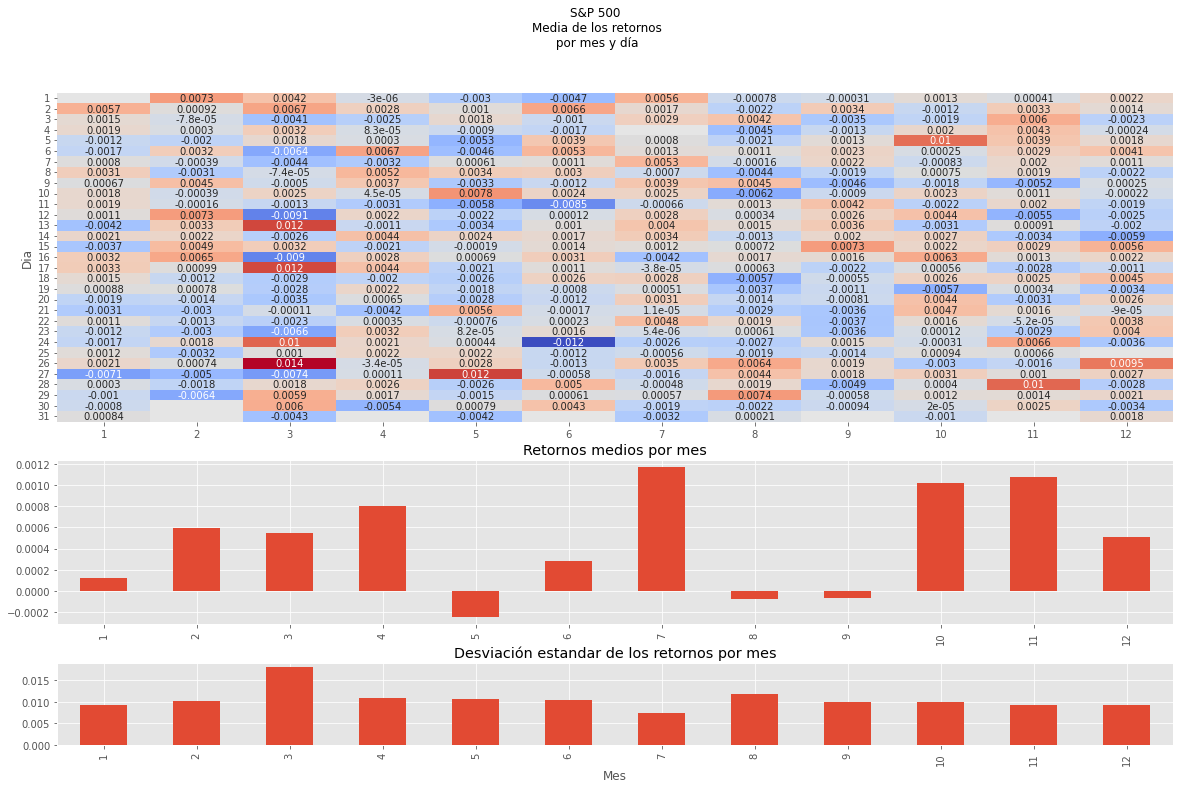

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=False, figsize=(20, 12), gridspec_kw = {'height_ratios':[4, 2, 1]})
fig.suptitle('S&P 500 \nMedia de los retornos\n por mes y día ')      
sns.heatmap(mes_dia, annot=True, cmap=plt.cm.coolwarm, cbar = False, ax=ax1)
ax1.axes.xaxis.set_label_text('')
ax2.set_title('Retornos medios por mes')
spy_mes.plot.bar(ax=ax2)
ax2.axes.xaxis.set_label_text('')
ax3.set_title('Desviación estandar de los retornos por mes')
spy.groupby('Mes').Retorno.std().plot.bar(ax=ax3)
plt.show()